In [2]:
import networkx as nx
import matplotlib.pyplot as plt

In [3]:
my_graph = nx.Graph()
my_graph.add_node(1)
my_graph.add_nodes_from([2, 3])
my_graph.add_nodes_from([
    (4, {"color": "red"}),
    (5, {"color": "green"}),
])
print(my_graph)

Graph with 5 nodes and 0 edges


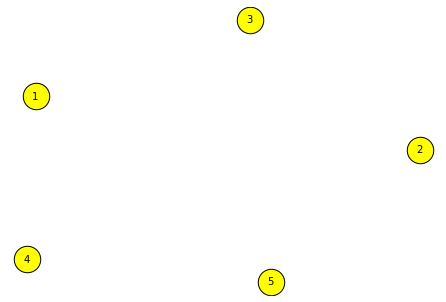

In [4]:
draw_options = {
    "font_size": 10,
    "node_size": 700,
    "node_color": "yellow",
    "edgecolors": "black",
    "linewidths": 1,
    "width": 1,
    "with_labels": True
}
nx.draw(my_graph, **draw_options)

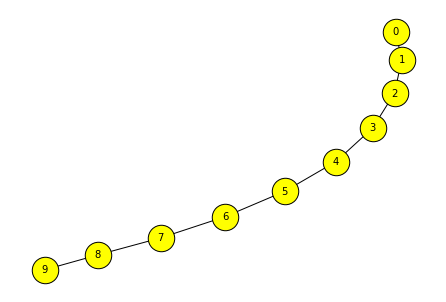

In [7]:
graph_other = nx.path_graph(10)
nx.draw(graph_other,  **draw_options)


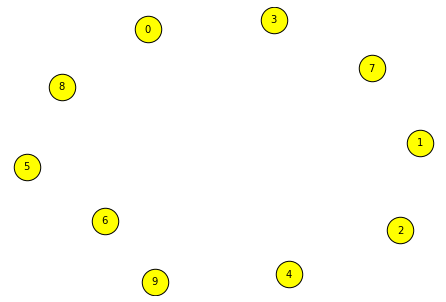

In [8]:
my_graph.add_nodes_from(graph_other)
nx.draw(my_graph,  **draw_options)

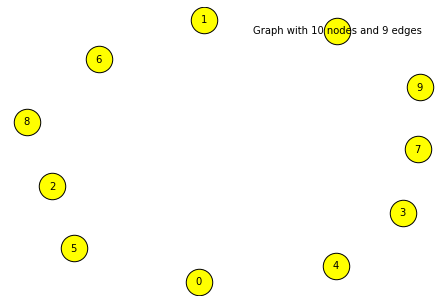

In [9]:
my_graph.add_node(graph_other)
nx.draw(my_graph,  **draw_options)

[(1, 2), (1, 3), (2, 3)]


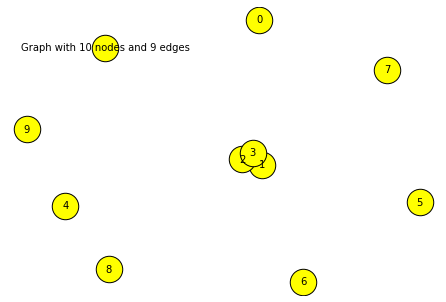

In [10]:
my_graph.add_edge(1, 2)
e = (2, 3)
my_graph.add_edge(*e)

my_graph.add_edges_from([(1, 2), (1, 3),(2, 3, {'weight': 3.1415})])
print(list(my_graph.edges))
nx.draw(my_graph,  **draw_options)

In [11]:
my_graph.clear()

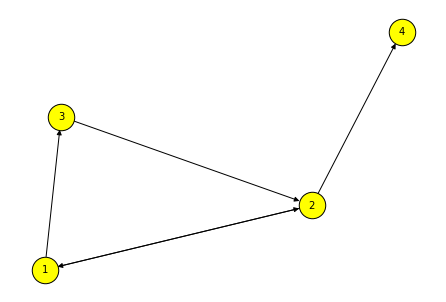

In [12]:
G = nx.DiGraph()
G.add_edge(2, 1)   # adds the nodes in order 2, 1
G.add_edge(1, 3)
G.add_edge(2, 4)
G.add_edge(1, 2)
G.add_edge(3, 2)
nx.draw(G,  **draw_options)


In [13]:
print(list(G.nodes))
print(list(G.edges))
print(list(G.neighbors(1))) 
print(G.out_degree[1])  # the number of edges exiting 1
print(G.in_degree[1])   # the number of edges entering 1
print(G.degree[1])      # the number of edges incident to 1

[2, 1, 3, 4]
[(2, 1), (2, 4), (1, 3), (1, 2), (3, 2)]
[3, 2]
2
1
3


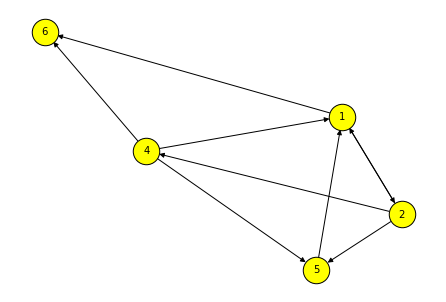

In [16]:

G.add_edge(4,1)
G.add_edge(4,5)
G.add_edge(5,1)
G.add_edge(2,5)
G.add_edge(6,5)
G.add_edge(1,6)
G.add_edge(3,5)
G.add_edge(4,6)
G.remove_node(3)
G.remove_edge(6, 5)
nx.draw(G,  **draw_options)

All edges with weight < 0.5:
(1, 2, 0.125)
(2, 1, 0.125)
(3, 4, 0.375)
(4, 3, 0.375)

All unique edges with weight < 0.5:
(1, 2, 0.125)
(3, 4, 0.375)


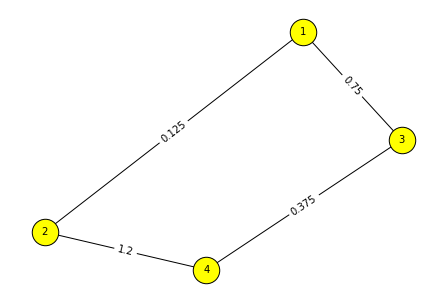

In [30]:
FG = nx.Graph()
FG.add_weighted_edges_from([(1, 2, 0.125), (1, 3, 0.75), (2, 4, 1.2), (3, 4, 0.375)])

pos=nx.spring_layout(FG)
nx.draw(FG,pos, **draw_options)
nx.draw_networkx_edge_labels(FG,pos,edge_labels=nx.get_edge_attributes(FG,'weight'));

print("All edges with weight < 0.5:")
for n, nbrs in FG.adj.items():
   for nbr, eattr in nbrs.items():
       wt = eattr['weight']
       if wt < 0.5: print(f"({n}, {nbr}, {wt:.3})")
print()
print("All unique edges with weight < 0.5:")
for (u, v, wt) in FG.edges.data('weight', default=0.0):
    if wt < 0.5:
        print(f"({u}, {v}, {wt:.3})")


## Generate random graph

G graph:
node1 = 5, node2 = 6 , weight = 0.929
node1 = 5, node2 = 7 , weight = 0.362
node1 = 5, node2 = 8 , weight = 0.844
node1 = 6, node2 = 0 , weight = 0.456
node1 = 6, node2 = 8 , weight = 0.651
node1 = 8, node2 = 4 , weight = 0.312
node1 = 8, node2 = 7 , weight = 0.0664
node1 = 1, node2 = 2 , weight = 0.0694


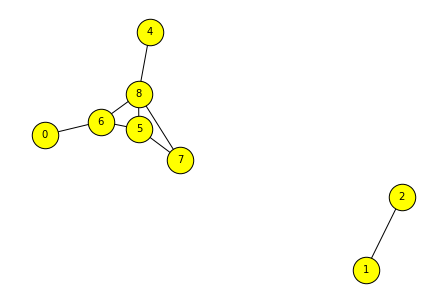

In [33]:
import numpy as np

def generate_random_graph(num_of_edges = 8, num_of_vertices = 10):
    G = nx.Graph()
    random_vertex = lambda: np.random.randint(0,num_of_vertices)
    for i in range(num_of_edges):
        u = random_vertex()
        while True:
            v = random_vertex()
            if v != u: break
        G.add_edge(u,v, weight=np.random.random())
    return G

def print_graph(G):
    for u,v,attr in G.edges.data('weight'):
        print(f'node1 = {u}, node2 = {v} , weight = {attr:.3}')

G = generate_random_graph()
print("G graph:")
print_graph(G)
nx.draw(G,  **draw_options)



H graph:
node1 = 4, node2 = 2 , weight = 0.428
node1 = 0, node2 = 7 , weight = 0.145
node1 = 0, node2 = 9 , weight = 0.735
node1 = 9, node2 = 1 , weight = 0.228
node1 = 9, node2 = 6 , weight = 0.938
node1 = 5, node2 = 8 , weight = 0.617


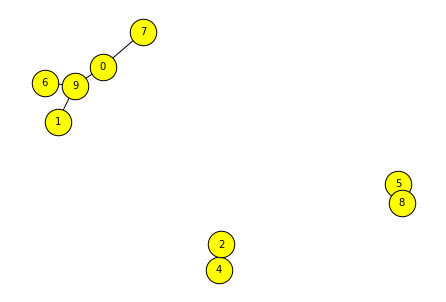

In [34]:
H = generate_random_graph()
print("\nH graph:")
print_graph(H)
nx.draw(H,  **draw_options)

node1 = 1, node2 = 2 , weight = 0.0694


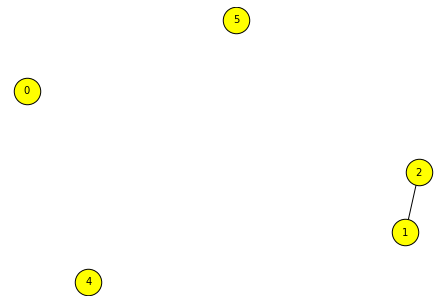

In [35]:
'''
subgraph(G, nbunch)
    Returns the subgraph induced on nodes in nbunch.
'''
G_sub = nx.subgraph(G,list(range(6)))
print_graph(G_sub)
nx.draw(G_sub,  **draw_options)

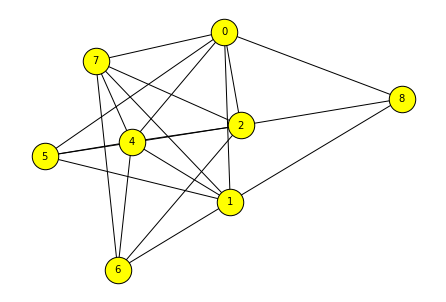

In [36]:
GC = nx.complement(G)  # every non-edge becomes an edge and vice-versa
nx.draw(GC,  **draw_options)

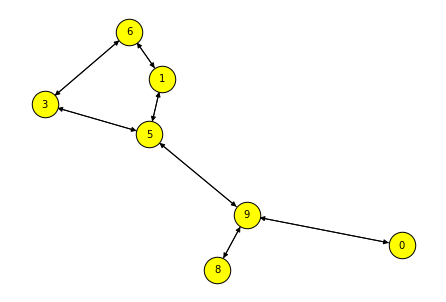

In [37]:
'''
to_directed(graph)
    Returns a directed view of the graph `graph`.
'''
G = generate_random_graph()

# frozen directed graph
G_directed = nx.to_directed(G)
# just a directed graph
G_directed = G.to_directed(as_view = False)
nx.draw(G_directed,  **draw_options)


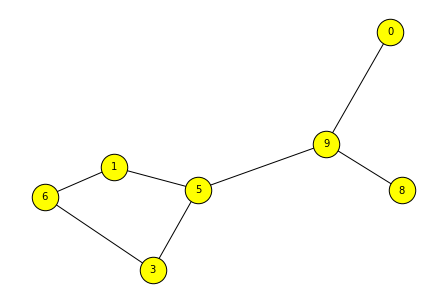

In [38]:
'''
to_undirected(graph)
    Returns an undirected view of the graph `graph`.
'''
# the first edge was returned
G_undirected = nx.to_undirected(G_directed)
nx.draw(G_undirected,  **draw_options)

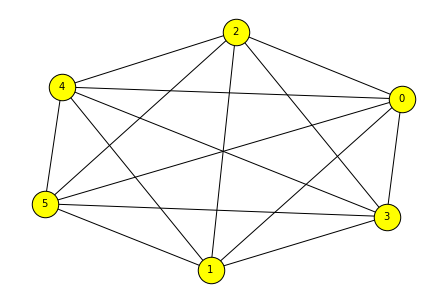

In [40]:
K_6 = nx.complete_graph(6)                  # Returns the complete graph K_n with n nodes.
nx.draw(K_6,  **draw_options)

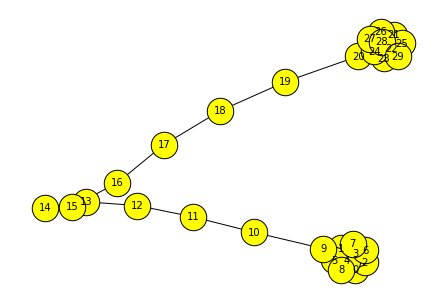

In [41]:
barbell = nx.barbell_graph(10, 10)          # Returns the Barbell Graph: two complete graphs connected by a path.
nx.draw(barbell,  **draw_options)

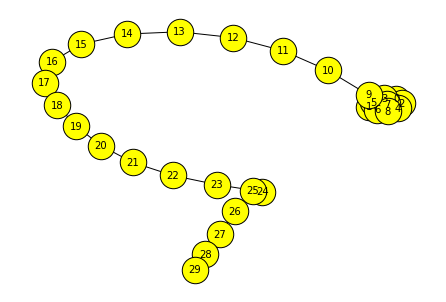

In [42]:

lollipop = nx.lollipop_graph(10, 20)        # Returns the Lollipop Graph; K_m connected to P_n.
nx.draw(lollipop,  **draw_options)

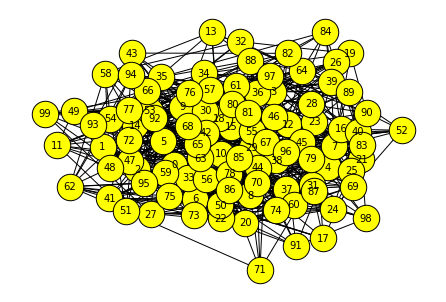

In [43]:
er = nx.erdos_renyi_graph(100, 0.15)        # Returns a G[n,p] random graph, also known as an Erdős-Rényi graph or a binomial graph.
nx.draw(er,  **draw_options)

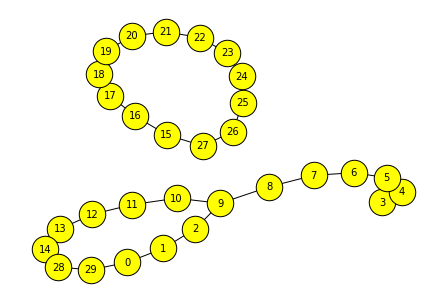

In [44]:
ws = nx.watts_strogatz_graph(30, 3, 0.1)    # Returns a Watts–Strogatz small-world graph.
nx.draw(ws,  **draw_options)

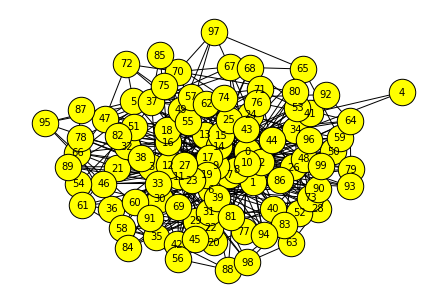

In [45]:
ba = nx.barabasi_albert_graph(100, 5)       # Returns a random graph according to the Barabási–Albert preferential attachment model.
nx.draw(ba,  **draw_options)

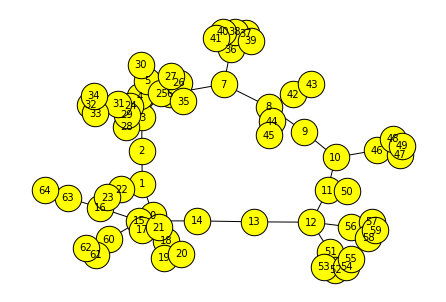

In [46]:
red = nx.random_lobster(10, 0.5, 0.5)      # Returns a random lobster graph.
nx.draw(red,  **draw_options)

## Advanced drawing

In [47]:
def generate_a_random_graph( size = 10 ,random_weight =True,weight=1,threshold = 0.5,**kwargs):
    rand = lambda:np.random.random()
    graph = nx.Graph(**kwargs)
    for v in range(size):
        for u in range(size):
            random_val = rand()
            edge_weight = random_val if random_weight else weight
            if random_val > threshold and v!=u:
                graph.add_edge(u,v,weight = round(edge_weight,3))
    return graph

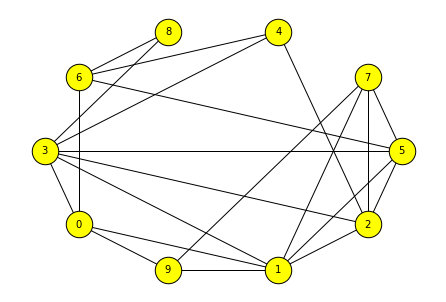

In [49]:
source = 0
size = 10
G = generate_a_random_graph(size = size ,threshold = 0.7) 
nx.draw_shell(G, **draw_options)

## Graph algorithms

In [50]:
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
# shortest paths and path lengths between nodes in the graph.
# These algorithms work with undirected and directed graphs
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
target = size -1
print('~~~shortest path~~~')
print(nx.shortest_path(G)) # returns dictionary of shortest paths
print(nx.has_path(G, source, target)) # boolean


~~~shortest path~~~
{3: {3: [3], 0: [3, 0], 1: [3, 1], 2: [3, 2], 4: [3, 4], 8: [3, 8], 5: [3, 5], 9: [3, 0, 9], 6: [3, 0, 6], 7: [3, 1, 7]}, 0: {0: [0], 3: [0, 3], 9: [0, 9], 1: [0, 1], 6: [0, 6], 2: [0, 3, 2], 4: [0, 3, 4], 8: [0, 3, 8], 5: [0, 3, 5], 7: [0, 9, 7]}, 9: {9: [9], 0: [9, 0], 1: [9, 1], 7: [9, 7], 3: [9, 0, 3], 6: [9, 0, 6], 2: [9, 1, 2], 5: [9, 1, 5], 4: [9, 0, 3, 4], 8: [9, 0, 3, 8]}, 1: {1: [1], 0: [1, 0], 2: [1, 2], 3: [1, 3], 5: [1, 5], 7: [1, 7], 9: [1, 9], 6: [1, 0, 6], 4: [1, 2, 4], 8: [1, 3, 8]}, 2: {2: [2], 1: [2, 1], 3: [2, 3], 4: [2, 4], 7: [2, 7], 5: [2, 5], 0: [2, 1, 0], 9: [2, 1, 9], 8: [2, 3, 8], 6: [2, 4, 6]}, 5: {5: [5], 1: [5, 1], 2: [5, 2], 3: [5, 3], 6: [5, 6], 7: [5, 7], 0: [5, 1, 0], 9: [5, 1, 9], 4: [5, 2, 4], 8: [5, 3, 8]}, 7: {7: [7], 1: [7, 1], 2: [7, 2], 5: [7, 5], 9: [7, 9], 0: [7, 1, 0], 3: [7, 1, 3], 4: [7, 2, 4], 6: [7, 5, 6], 8: [7, 1, 3, 8]}, 4: {4: [4], 2: [4, 2], 3: [4, 3], 6: [4, 6], 1: [4, 2, 1], 7: [4, 2, 7], 5: [4, 2, 5], 0: [4, 3,

In [51]:
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
# Shortest path algorithms for weighted graphs.
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
print('\n~~~weighted graph~~~')
#dijkstra
print(nx.dijkstra_predecessor_and_distance(G, source)) # returns dictionary of shortest path 
print(nx.dijkstra_path(G, source, target ))  # returns list
# Floyd Warshall
print(nx.floyd_warshall_numpy(G)) # returns a numpy array



~~~weighted graph~~~
({0: [], 3: [0], 9: [0], 1: [0], 6: [0], 4: [6], 5: [6], 8: [6], 7: [9], 2: [3]}, {0: 0, 6: 0.768, 9: 0.859, 3: 0.945, 1: 0.992, 8: 1.47, 5: 1.509, 4: 1.6, 7: 1.6219999999999999, 2: 1.6509999999999998})
[0, 9]
[[0.    0.945 1.65  0.852 0.706 0.81  1.626 0.826 0.921 1.551]
 [0.945 0.    0.859 0.992 1.651 1.509 1.622 1.6   1.47  0.768]
 [1.65  0.859 0.    0.798 1.729 1.579 0.763 2.459 2.329 1.627]
 [0.852 0.992 0.798 0.    0.966 0.81  0.916 1.678 1.773 1.551]
 [0.706 1.651 1.729 0.966 0.    0.768 0.966 0.937 1.627 1.509]
 [0.81  1.509 1.579 0.81  0.768 0.    0.816 1.573 1.443 0.741]
 [1.626 1.622 0.763 0.916 0.966 0.816 0.    1.903 2.259 1.557]
 [0.826 1.6   2.459 1.678 0.937 1.573 1.903 0.    1.534 0.832]
 [0.921 1.47  2.329 1.773 1.627 1.443 2.259 1.534 0.    0.702]
 [1.551 0.768 1.627 1.551 1.509 0.741 1.557 0.832 0.702 0.   ]]


[(0, 9), (9, 1), (1, 0)]


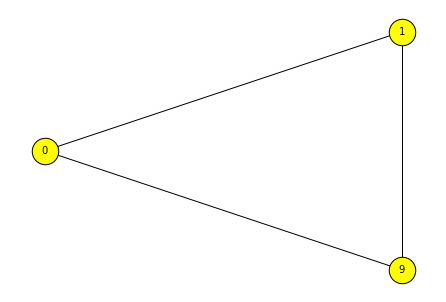

In [52]:
cycle = nx.find_cycle(G)
print(cycle)
nx.draw_shell(nx.Graph(cycle), **draw_options)

{(1, 2), (4, 6), (0, 9), (5, 7), (8, 3)}


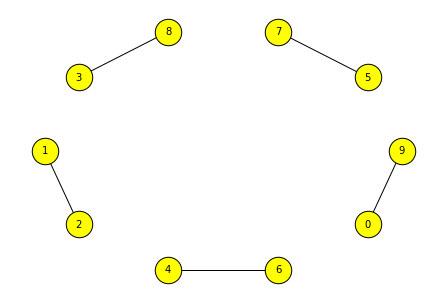

In [53]:
max_weight_matching = nx.max_weight_matching(G)
print(max_weight_matching)
nx.draw_shell(nx.Graph(max_weight_matching) , **draw_options)

## Bipartite graphs

Some algorithms are much more efficient when the graph is bipartite.

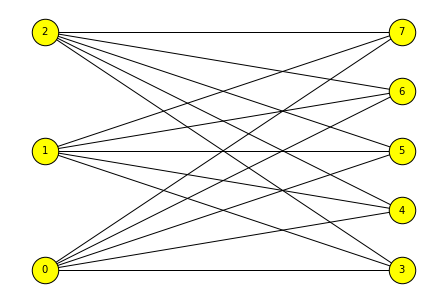

In [54]:
K_3_5 = nx.complete_bipartite_graph(3, 5)   # Returns the complete bipartite graph with sides of size 3 and 5.
left_nodes, right_nodes = nx.bipartite.sets(K_3_5)
nx.draw(K_3_5,  **draw_options, pos=nx.bipartite_layout(K_3_5, left_nodes))


But there is a catch: how can the system know what are the two parts?

In [59]:
G = nx.Graph()
G.add_edges_from([(1,2),(1,3),(4,2), (5,6),(5,7),(8,7)])
left_nodes, right_nodes = nx.bipartite.sets(G) # Error: AmbiguousSolution
nx.draw(G,  **draw_options, pos=nx.bipartite_layout(G, left_nodes))  

AmbiguousSolution: Disconnected graph: Ambiguous solution for bipartite sets.

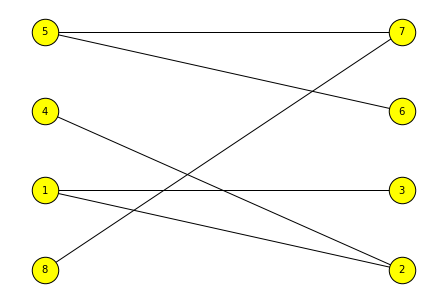

In [61]:
# left_nodes, right_nodes = nx.bipartite.sets(G) # Error: AmbiguousSolution
left_nodes, right_nodes = [ [1,4,5,8], [2,3,6,7] ] 
nx.draw(G,  **draw_options, pos=nx.bipartite_layout(G, left_nodes))

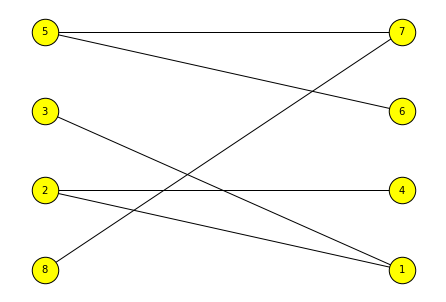

In [62]:

left_nodes, right_nodes = [ [2,3,5,8], [1,4,6,7] ] 
nx.draw(G,  **draw_options, pos=nx.bipartite_layout(G, left_nodes))

{0: 3, 1: 4, 2: 5, 3: 0, 4: 1, 5: 2}


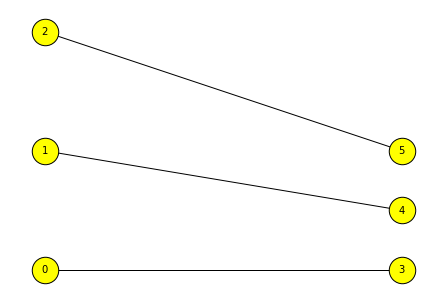

In [64]:
max_matching = nx.bipartite.maximum_matching(K_3_5)
print(max_matching)
left_nodes, right_nodes = nx.bipartite.sets(K_3_5)
nx.draw(nx.Graph(max_matching.items()),  **draw_options, pos=nx.bipartite_layout(K_3_5, left_nodes))

In [65]:
max_matching = nx.bipartite.maximum_matching(G) # Error: AmbiguousSolution

AmbiguousSolution: Disconnected graph: Ambiguous solution for bipartite sets.

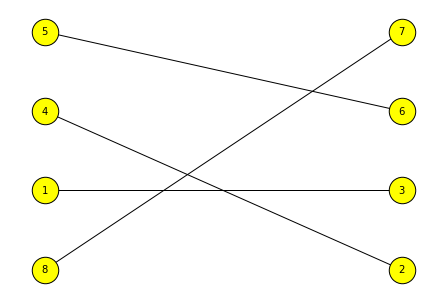

In [66]:
left_nodes = [1,4,5,8]
max_matching = nx.bipartite.maximum_matching(G, left_nodes) 
nx.draw(nx.Graph(max_matching.items()),  **draw_options, pos=nx.bipartite_layout(G,left_nodes))

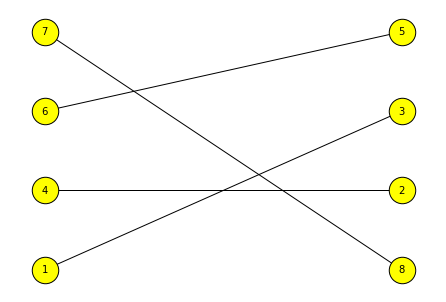

In [67]:
left_nodes = [1,4,6,7]
max_matching = nx.bipartite.maximum_matching(G, left_nodes) 
nx.draw(nx.Graph(max_matching.items()),  **draw_options, pos=nx.bipartite_layout(G,left_nodes))